In [48]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
1.16.2
0.24.2


In [49]:
df = pd.read_csv('Raw Data/2015.csv')
df = df.rename(columns={'M/f': 'Gender', 'Official time': 'Official', 'Gender': 'Genderdiv'})
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Genderdiv,Division
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,0:14:43,0:29:43,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,0:14:43,0:29:43,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,0:14:43,0:29:43,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,0:14:43,0:29:44,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,0:14:43,0:29:44,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [50]:
def convert_Pace(raw_time):
    """ This function converts input string of raw time in
        hh:mm:ss format to mm.mm float.
    """
    
    if raw_time == np.nan:
        return np.nan
    else:
        hours, minutes, seconds = raw_time.split(':')
        return int(hours)*60 + int(minutes) + int(seconds)/60
    

df.Pace = df.Pace.map(convert_Pace)
df.Pace.head()

0    4.933333
1    4.966667
2    4.983333
3    5.000000
4    5.000000
Name: Pace, dtype: float64

In [51]:
df.Pace.describe()

count    26598.000000
mean         8.644684
std          1.545051
min          4.933333
25%          7.583333
50%          8.383333
75%          9.400000
max         19.800000
Name: Pace, dtype: float64

Text(0, 0.5, 'Number of people')

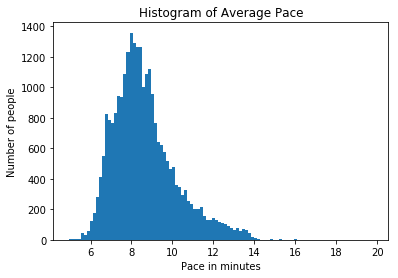

In [57]:
plt.hist(df.Pace, bins = 100)
plt.title('Histogram of Average Pace')
plt.xlabel('Pace in minutes')
plt.ylabel('Number of people')